# Método de Diferencias Finitas para EDPs Elípticas
El **Método de Diferencias Finitas (MDF)** es un enfoque para resolver Ecuaciones Diferenciales Parciales (EDPs) que consiste en discretizar el dominio en una malla y aproximar las derivadas en cada nodo.

Para una EDP elíptica como la Ecuación de Laplace ($\nabla^2 T = 0$), al aplicar las aproximaciones de diferencias finitas en cada nodo interior, se genera un sistema de ecuaciones algebraicas lineales de la forma:

$$ [A]\{T\} = \{b\} $$

Donde:
- $\{T\}$ es el vector de las temperaturas desconocidas en los nodos interiores.
- $[A]$ es la matriz de coeficientes, que depende de la geometría de la malla.
- $\{b\}$ es el vector de términos independientes, que contiene la influencia de las condiciones de frontera.

A diferencia de los métodos iterativos (como Liebmann), el MDF construye este sistema completo y lo resuelve de forma **directa** para encontrar todas las temperaturas de una sola vez.

In [1]:
from mnspy import DiferenciasFinitas, mostrar_matrix

## Ejemplo 1: Placa con Fronteras de Temperatura Fija (Dirichlet)
 
**Problema:** Resolver la distribución de temperatura en una placa cuadrada de 5x5 nodos, con temperaturas fijas en todos sus bordes.

In [2]:
# Creamos la instancia de la clase `DiferenciasFinitas`.
# Se definen las temperaturas para los bordes 'norte', 'sur', 'oeste' y 'este'.
lp_1 = DiferenciasFinitas((5, 5), {'norte': 100.0, 'sur': 0.0, 'oeste': 75.0, 'este': 50.0})

In [3]:
print("--- Sistema de Ecuaciones [A]{T}={b} ---")
# El método `mostrar_sistema()` presenta la matriz [A] y el vector {b} que se generaron.
lp_1.sel.mostrar_sistema()

--- Sistema de Ecuaciones [A]{T}={b} ---


<IPython.core.display.Math object>

In [4]:
print("--- Solución del Sistema (Temperaturas en Nodos Interiores) ---")
# El método `solucion()` resuelve el sistema y muestra los valores de temperatura para cada nodo interior.
lp_1.sel.solucion()

--- Solución del Sistema (Temperaturas en Nodos Interiores) ---


,Solución
"$T_{1,1}$",42.8571
"$T_{2,1}$",33.2589
"$T_{3,1}$",33.9286
"$T_{1,2}$",63.1696
"$T_{2,2}$",56.25
"$T_{3,2}$",52.4554
"$T_{1,3}$",78.5714
"$T_{2,3}$",76.1161
"$T_{3,3}$",69.6429


--- Gráfica con Coordenadas de Nodos ---


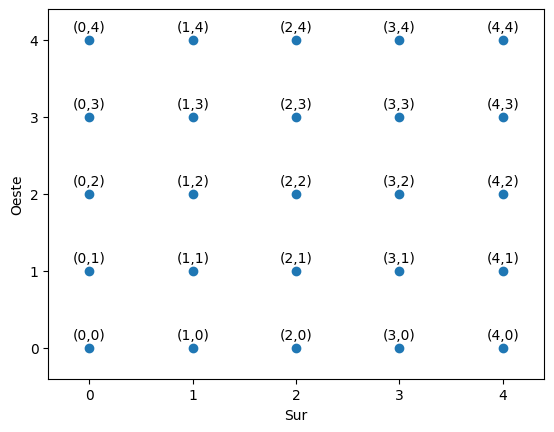

In [5]:
print("--- Gráfica con Coordenadas de Nodos ---")
# Muestra la numeración de los nodos en la malla.
lp_1.graficar_coordenadas()

--- Gráfica con Valores de Temperatura ---


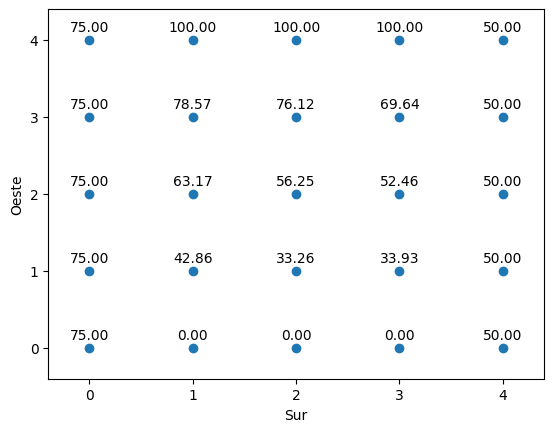

In [6]:
print("--- Gráfica con Valores de Temperatura ---")
# Muestra la temperatura calculada en cada nodo de la malla.
lp_1.graficar_valores()

--- Gráfica de Contornos de Temperatura ---


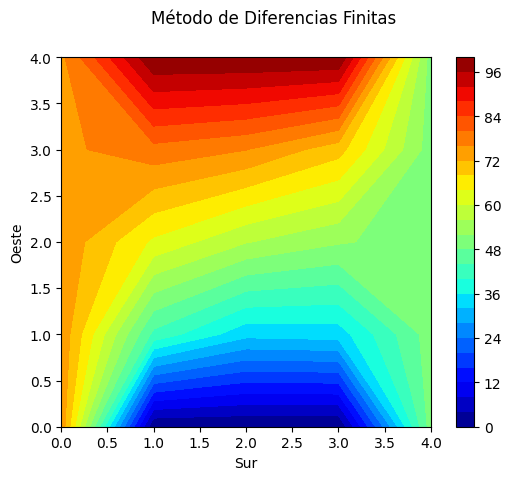

In [7]:
print("--- Gráfica de Contornos de Temperatura ---")
# Visualiza las isotermas (líneas de igual temperatura).
lp_1.graficar()

In [8]:
print("--- Matriz de Temperatura Final ---")
# Muestra la matriz completa con las temperaturas en todos los nodos (fronteras e interiores).
mostrar_matrix(lp_1.U, 2)

--- Matriz de Temperatura Final ---


<IPython.core.display.Math object>

## Ejemplo 2: Placa con Fronteras Aisladas (Neumann)

**Problema:** Resolver la distribución de temperatura para una placa donde los bordes norte y sur están aislados (flujo de calor cero), y los otros tienen temperaturas fijas.

In [9]:
# Se especifica un borde aislado con el string 'aislado'.
# Esto corresponde a una condición de frontera de Neumann (derivada normal igual a cero).
lp_2 = DiferenciasFinitas((5, 5), {'norte': 'aislado', 'sur': 'aislado', 'oeste': 75.0, 'este': 50.0})

In [10]:
print("--- Sistema de Ecuaciones (con fronteras aisladas) ---")
lp_2.sel.mostrar_sistema()

--- Sistema de Ecuaciones (con fronteras aisladas) ---


<IPython.core.display.Math object>

In [11]:
print("--- Solución del Sistema ---")
lp_2.sel.solucion()

--- Solución del Sistema ---


,Solución
"$T_{1,0}$",68.75
"$T_{2,0}$",62.5
"$T_{3,0}$",56.25
"$T_{1,1}$",68.75
"$T_{2,1}$",62.5
"$T_{3,1}$",56.25
"$T_{1,2}$",68.75
"$T_{2,2}$",62.5
"$T_{3,2}$",56.25
"$T_{1,3}$",68.75



--- Gráfica de Contornos de Temperatura ---


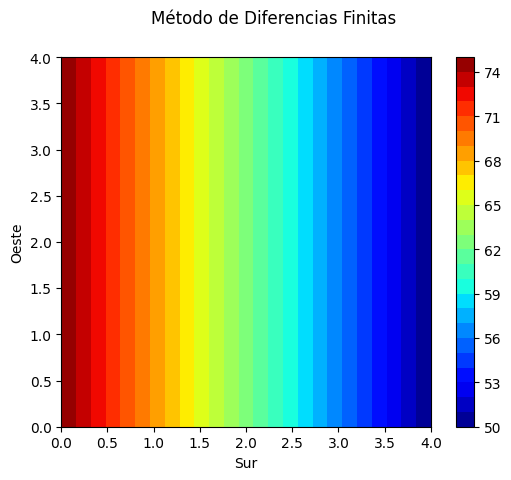

In [12]:
print("\n--- Gráfica de Contornos de Temperatura ---")
# Nótese cómo las isotermas son perpendiculares a los bordes aislados, indicando que no hay flujo de calor a través de ellos.
lp_2.graficar()

--- Campo Vectorial del Flujo de Calor ---


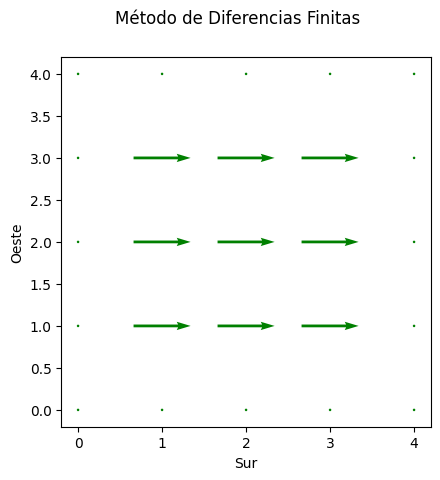

In [13]:
print("--- Campo Vectorial del Flujo de Calor ---")
# Los vectores de flujo de calor son paralelos a los bordes aislados.
lp_2.graficar_campos()

## Ejemplo 3: Otro Caso con Fronteras Mixtas
 
**Problema:** Resolver para una placa con el borde norte aislado y los otros tres con temperaturas fijas.

In [14]:
lp_3 = DiferenciasFinitas((5, 5), {'norte': 'aislado', 'sur': 100.0, 'oeste': 75.0, 'este': 50.0})

In [15]:
print("--- Sistema de Ecuaciones ---")
lp_3.sel.mostrar_sistema()

--- Sistema de Ecuaciones ---


<IPython.core.display.Math object>

In [16]:
print("--- Solución del Sistema ---")
lp_3.sel.solucion()

--- Solución del Sistema ---


,Solución
"$T_{1,1}$",83.4109
"$T_{2,1}$",82.6286
"$T_{3,1}$",74.2614
"$T_{1,2}$",76.0151
"$T_{2,2}$",72.842
"$T_{3,2}$",64.4172
"$T_{1,3}$",72.8074
"$T_{2,3}$",68.3073
"$T_{3,3}$",60.5652
"$T_{1,4}$",71.9074


--- Gráfica de Contornos de Temperatura ---


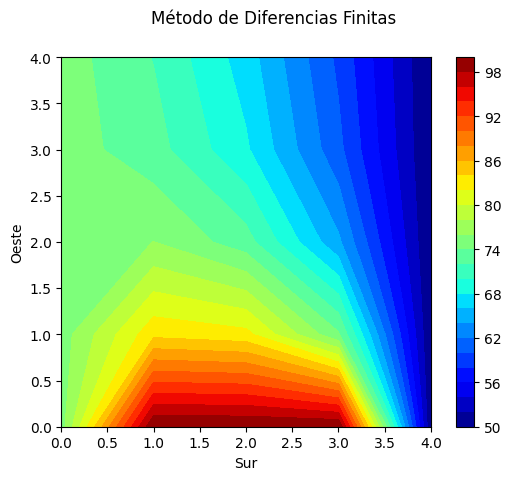

In [17]:
print("--- Gráfica de Contornos de Temperatura ---")
lp_3.graficar()

--- Campo Vectorial del Flujo de Calor ---


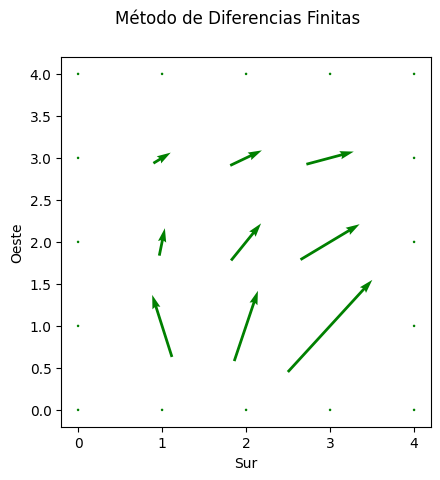

In [18]:
print("--- Campo Vectorial del Flujo de Calor ---")
lp_3.graficar_campos()